---
# Simulate pRF-design

The goal of this notebook is to assess the target pRF's response to various flavors of the design matrix, with differing inter-sweep blanks, rests, and span across visual field. These different design matrices are characterized as follows:
- `sim1`: 30s baseline (-);      span [-3,3] (-);     rest duration 30s (+10s);    no inter-sweep blank (-)
- `sim2`: 30s baseline (-);      span [-4,4] (+1);    rest duration 20s (-);       no inter-sweep blank (-)
- `sim3`: 30s baseline (-);      span [-5,5] (+2);    rest duration 20s (-);       no inter-sweep blank (-)
- `sim4`: 30s baseline (-);      span [-5,5] (+2);    rest duration 30s (+10);     no inter-sweep blank (-)
- `sim5`: 30s baseline (-);      span [-5,5] (+2);    rest duration 30s (+10);     3s inter-sweep blank (+3)
- `sim6`: 30s baseline (-);      span [-5,5] (+2);    rest duration 20s (-);       5s inter-sweep blank (+5)
- `sim7`: 20s baseline (-10);    span [-5,5] (+2);    rest duration 15s (-5);      10s inter-sweep blank (+10)
- `sim8`: 20s baseline (-10);    span [-7,7] (+4);    rest duration 15s (-5);      15s inter-sweep blank (+15)

In [16]:
from linescanning import utils, prf
import matplotlib.pyplot as plt
import numpy as np
import os
opj = os.path.join

In [12]:
path = "/data1/projects/MicroFunc/Jurjen/projects/hemifield/testing/prf_design"
deriv = "/data1/projects/MicroFunc/Jurjen/projects/hemifield/derivatives"
subject = "sub-003"

In [119]:

nr_vols = 2400
path_designs = utils.get_file_from_substring('sub-999', path)

# designs = []

In [122]:
for ix,log_dir in enumerate(path_designs):
    try:
        dd = designs[ix]
        print(f"design for sim{ix+1} exists")
    except:
        print(f"Creating design from sim{ix+1}")
        design = prf.create_line_prf_matrix(log_dir, 
                                            nr_trs=nr_vols,
                                            TR=0.105,
                                            n_pix=270)
        designs.append(design)

design for sim1 exists
design for sim2 exists
design for sim3 exists
design for sim4 exists
design for sim5 exists
design for sim6 exists
design for sim7 exists
design for sim8 exists
Creating design from sim9


In [123]:
cx_dir = opj(deriv, "pycortex", subject)
prf_dir = opj(deriv, "prf", subject, "ses-1")
subject_info = utils.CollectSubject(subject, prf_dir=prf_dir, cx_dir=cx_dir, settings='recent', hemi="L")
subject_info.normalization_params

array([ 1.725e+00, -1.924e+00,  7.617e-01,  1.331e+00, -3.198e-02,
        4.313e-02,  9.027e+00,  6.442e+01,  1.057e+02,  8.901e-01])

Using settings file: /data1/projects/MicroFunc/Jurjen/projects/hemifield/derivatives/prf/sub-003/ses-1/20220210_model-norm_desc-settings.yml


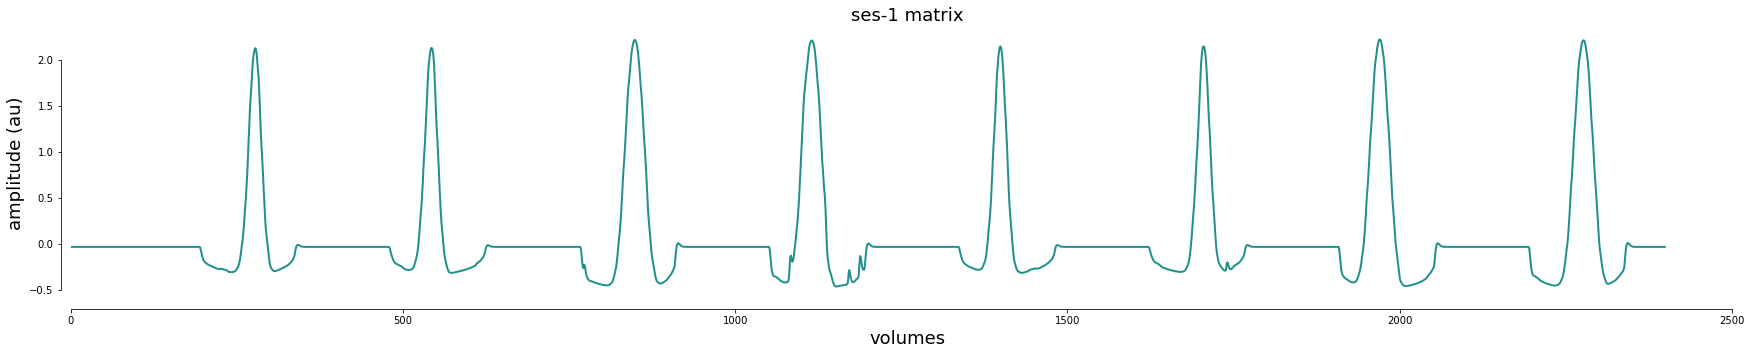

In [124]:
modelling = prf.pRFmodelFitting(whole_brain_func,
                                design_matrix=designs[-1],
                                settings=subject_info.analysis_yaml)
                                
modelling.load_params(subject_info.normalization_params, model=model, stage=stage)
params, prediction = modelling.plot_vox(vox_nr=target_vertex, model=model, stage=stage, make_figure=False)

utils.LazyPlot(prediction,
            figsize=(30,5),
            line_width=2,
            x_label="volumes",
            title=f"ses-1 matrix",
            y_label="amplitude (au)",
            set_xlim_zero=True,
            font_size=18)

In [125]:
whole_brain_func = np.load(opj(prf_dir, "sub-003_ses-1_task-2R_desc-avg_bold_hemi-LR.npy"))
whole_brain_prf  = opj(prf_dir, "sub-003_ses-1_task-2R_model-gauss_stage-iter_desc-prf_params.npy")
target_vertex = subject_info.vert_info.get('index', hemi="lh")

# model settings
model = "norm"
stage = "iter"

# predictions = []
for ix, sim_design in enumerate(designs):
    try:
        ff = predictions[ix]
        print(f"Prediction for sim{ix+1} exists")
    except:
        print(f"Creating prediction for sim{ix+1}")
        modelling = prf.pRFmodelFitting(whole_brain_func,
                                        design_matrix=sim_design,
                                        settings=subject_info.analysis_yaml)
                                        
        modelling.load_params(subject_info.normalization_params, model=model, stage=stage)
        params, prediction = modelling.plot_vox(vox_nr=target_vertex, model=model, stage=stage, make_figure=False)

        predictions.append(prediction)

Prediction for sim1 exists
Prediction for sim2 exists
Prediction for sim3 exists
Prediction for sim4 exists
Prediction for sim5 exists
Prediction for sim6 exists
Prediction for sim7 exists
Prediction for sim8 exists
Creating prediction for sim9
Using settings file: /data1/projects/MicroFunc/Jurjen/projects/hemifield/derivatives/prf/sub-003/ses-1/20220210_model-norm_desc-settings.yml


/data1/projects/MicroFunc/Jurjen/projects/hemifield/testing/prf_design/predictions.pdf


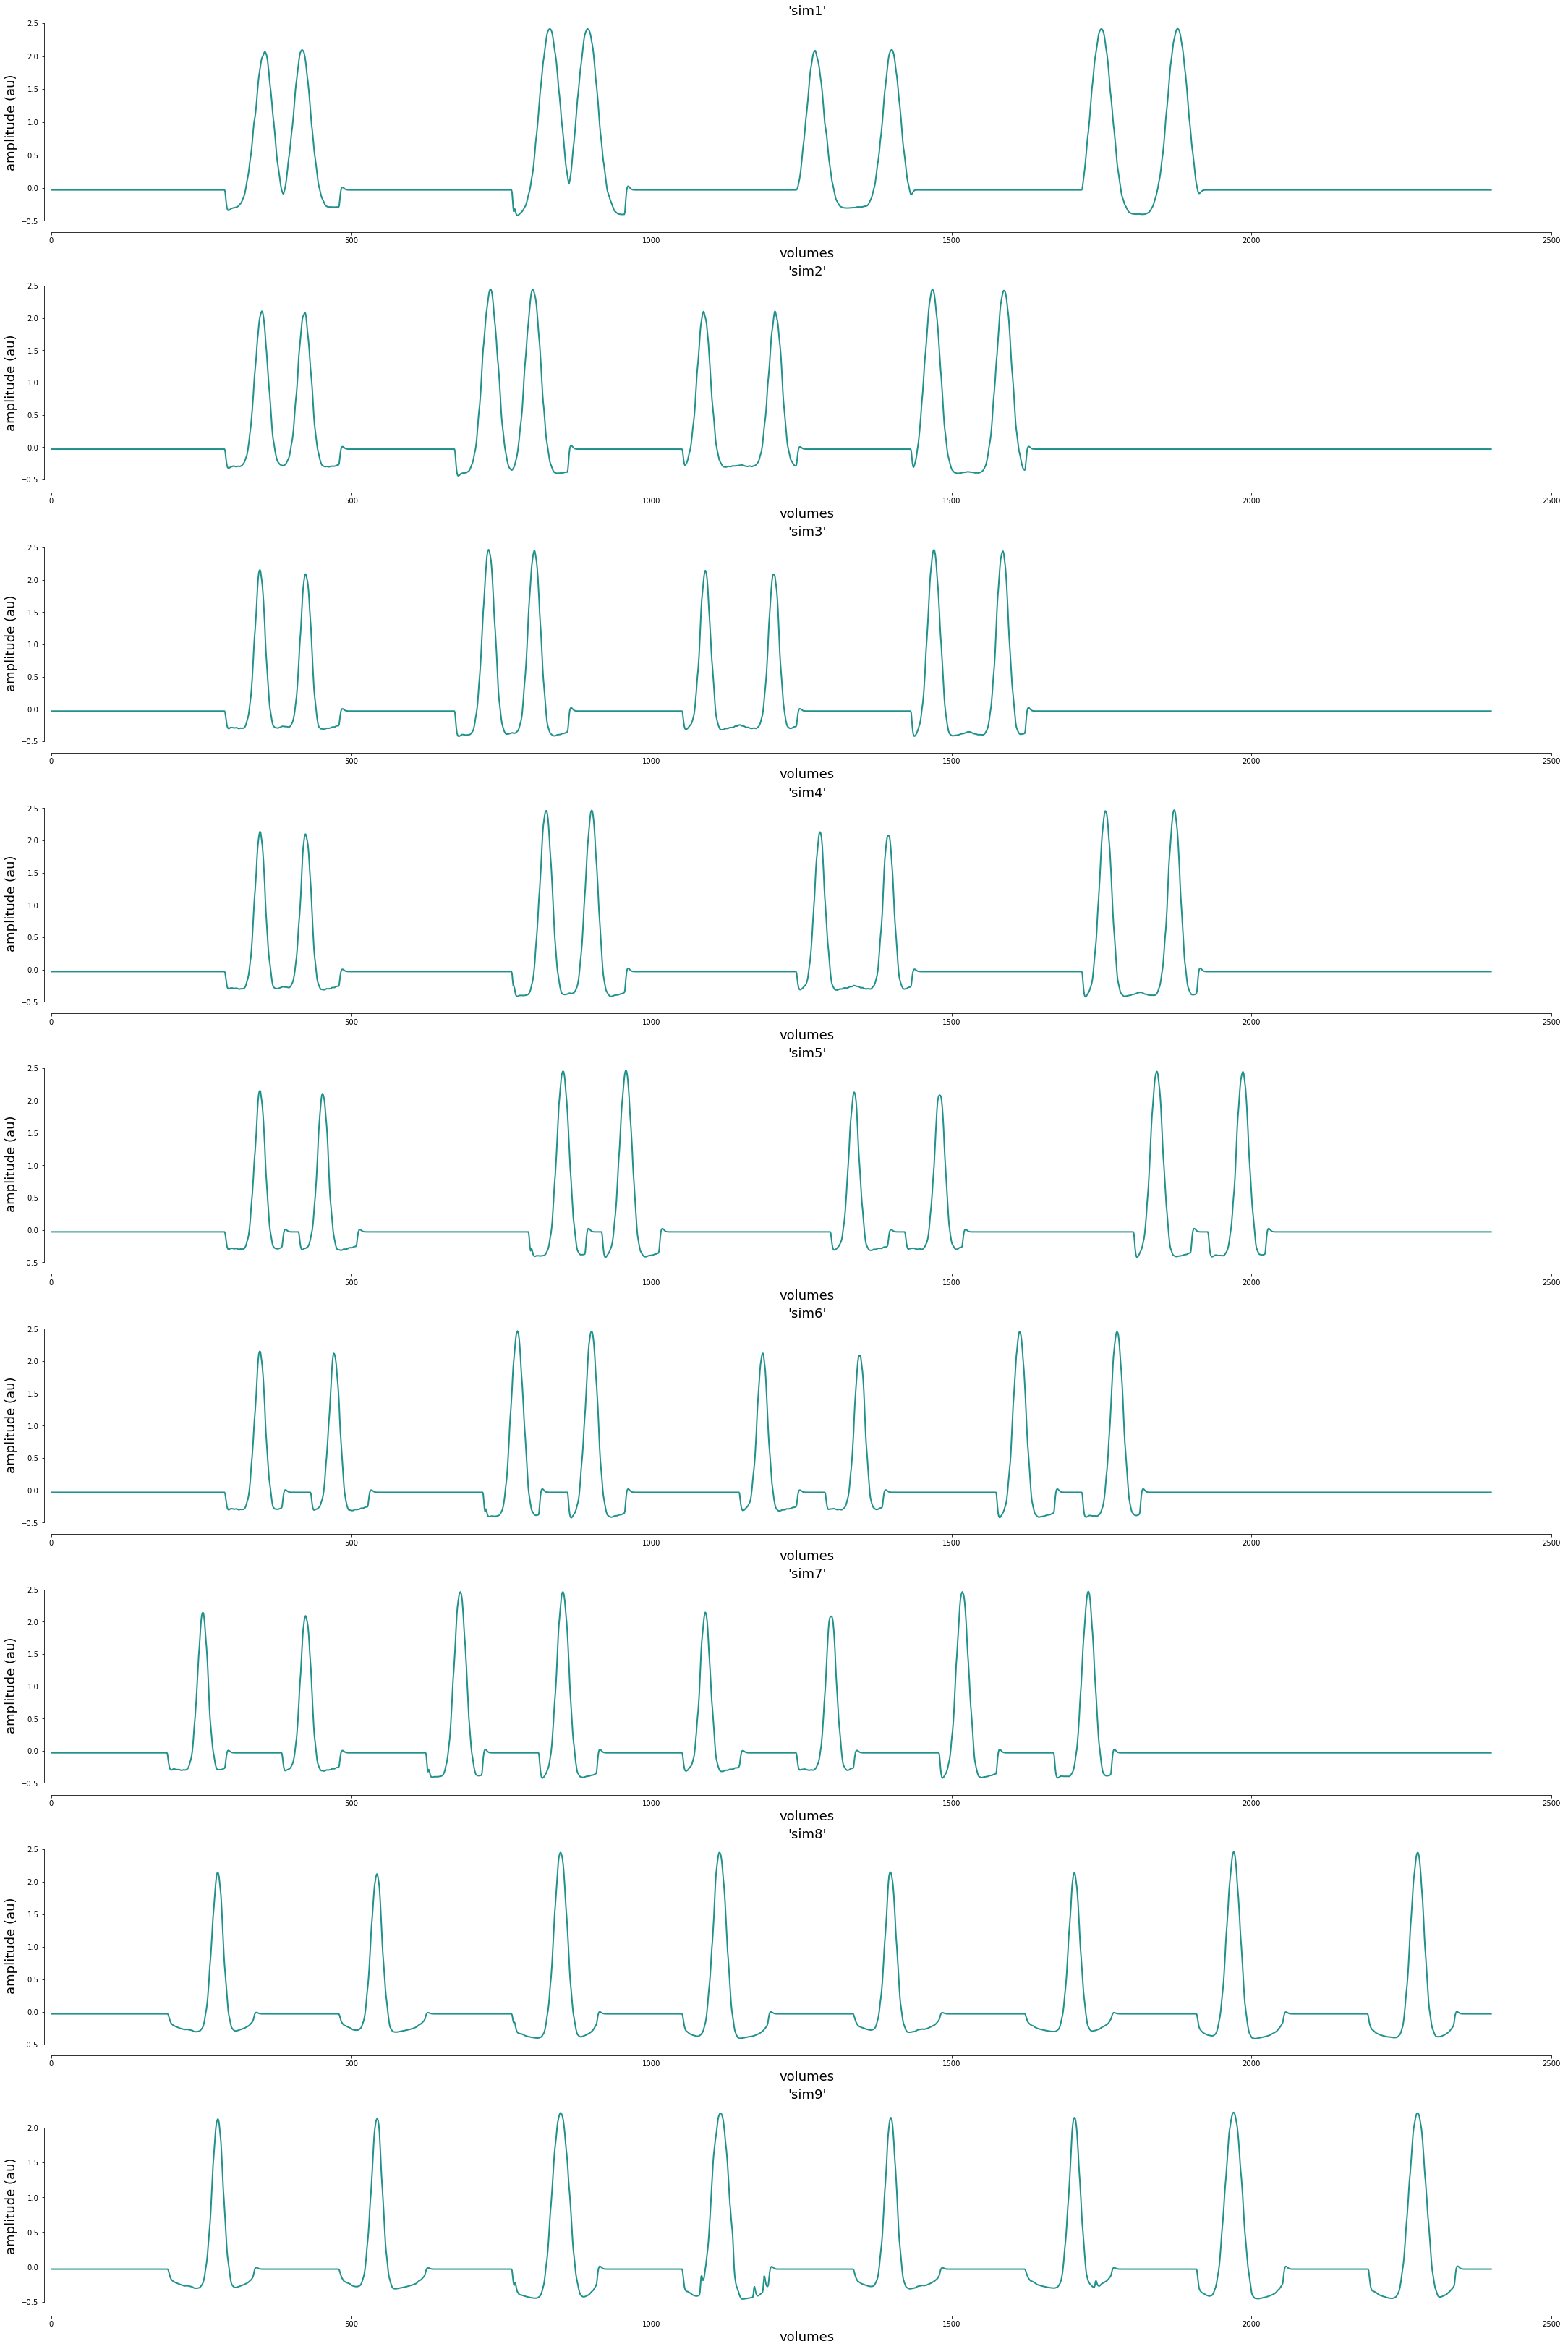

In [126]:
fig = plt.figure(constrained_layout=True, figsize=(30,5*len(predictions)))
gs00 = fig.add_gridspec(len(predictions), 1)
fname = opj(path, 'predictions.pdf')

for ix,plot in enumerate(predictions):
    ax = fig.add_subplot(gs00[ix])

    # timecourse
    utils.LazyPlot(plot,
                   axs=ax,
                   line_width=2,
                   x_label="volumes",
                   title=f"'sim{ix+1}'",
                   y_label="amplitude (au)",
                   set_xlim_zero=True,
                   font_size=18,
                   save_as=fname)

print(fname)                   

Using settings file: /data1/projects/MicroFunc/Jurjen/projects/hemifield/derivatives/prf/sub-003/ses-1/20220210_model-norm_desc-settings.yml


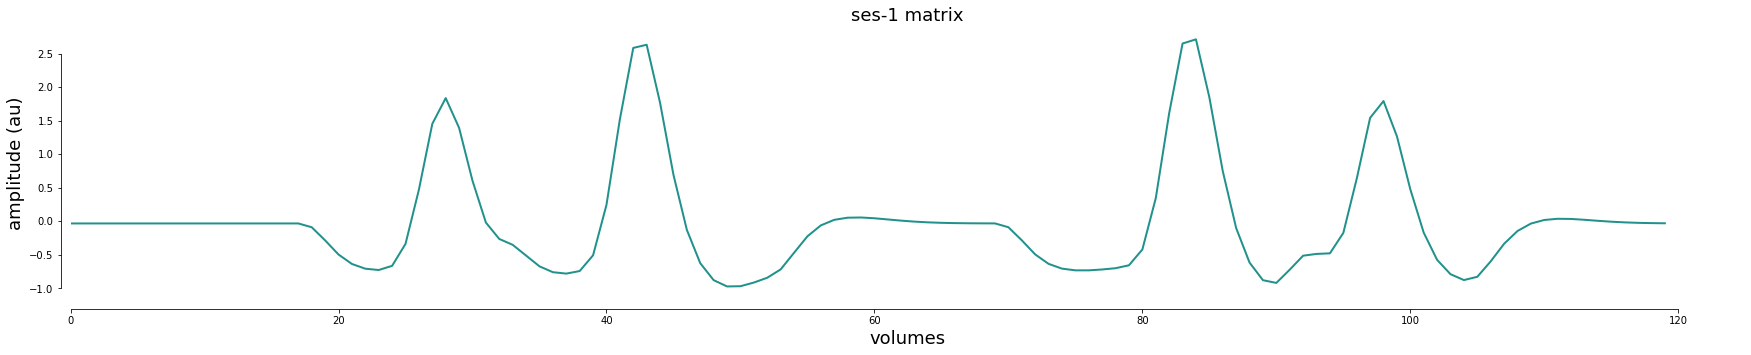

In [115]:
modelling = prf.pRFmodelFitting(whole_brain_func,
                                design_matrix=subject_info.design_matrix,
                                settings=subject_info.analysis_yaml)

# fn_settings = opj(prf_dir, "20211222_model-gauss_desc-settings.yml")

# modelling = prf.pRFmodelFitting(whole_brain_func,
#                                 design_matrix=subject_info.design_matrix,
#                                 settings=fn_settings)
                                
model = "norm"
stage = "iter"
modelling.load_params(subject_info.normalization_params, model=model, stage=stage)
params, prediction = modelling.plot_vox(vox_nr=target_vertex, model=model, stage=stage, make_figure=False)

utils.LazyPlot(prediction,
            figsize=(30,5),
            line_width=2,
            x_label="volumes",
            title=f"ses-1 matrix",
            y_label="amplitude (au)",
            set_xlim_zero=True,
            font_size=18)    

In [108]:
modelling.__dict__

{'data': array([[ 0.        , -0.03916301, -0.00192493, ..., -0.119718  ,
         -0.13733229,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.08403087,
          0.37586713,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.04723218,
          0.47777218,  0.        ],
        ...,
        [ 0.01340033,  0.01416699,  0.02283331, ..., -0.0365518 ,
         -0.24196693,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.35514617,
          0.14782119,  0.        ],
        [ 0.18993755,  0.        ,  0.        , ..., -0.24101248,
          0.51217914,  0.        ]], dtype=float32),
 'design_matrix': array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0